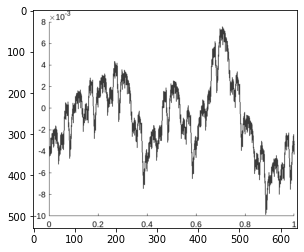

Fractal dimension, Df = 1.3744278660146234


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

c = Image.open("AAR2020_3.png").convert('L') 
c = np.array(c)

plt.imshow(c, cmap='gray')
plt.axis('image')
plt.show()

def boxcount(Z, k):
    S = np.add.reduceat(
        np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                           np.arange(0, Z.shape[1], k), axis=1)

    return len(np.where(S > 0)[0])

def fractal_dimension(Z):
    assert(len(Z.shape) == 2)

    Z = (Z < 128)

    p = min(Z.shape)

    n = 2**np.floor(np.log2(p))

    n = int(np.log2(n))

    sizes = 2**np.arange(n, 1, -1)

    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

df = fractal_dimension(c)

print(f'Fractal dimension, Df = {df}')
